In [10]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import svm, datasets
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.svm import SVC  
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix , accuracy_score, matthews_corrcoef, roc_curve, auc , make_scorer
from sklearn.utils import shuffle
from sklearn.cross_validation import KFold

from sklearn.metrics import roc_auc_score

In [50]:
def DATA(filename):
    #filename = 'classifier-train-data.csv'
    data = pd.read_csv(filename)

    #specify featuure and target
    Feature = data.drop(['class_id', 'Unnamed: 0'], axis=1)
    Target  = data['class_id']
   
    # shuffle the dataset
    X, y = shuffle(Feature, Target, random_state=0)

    #standardize data
    X = (X - X.mean()) / X.std()

    # Split the dataset in two equal parts
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.5, random_state=0)

    return X_train, X_test, y_train, y_test, X, y


def run_SVM (X_train, X_test, y_train, y_test, kernel= 'rbf'):
    #Train algorithm
    svclassifier = SVC(C=1, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel= kernel,
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
    
    svclassifier.fit(X_train, y_train)
    #make prediction
    y_pred = svclassifier.predict(X_test)
    
    # results
    print("Confusion Marix:  ")
    print(confusion_matrix(y_test,y_pred))  
    print("Classification Report: ")
    print(classification_report(y_test,y_pred))
    print("Accuracy:  %f " % (accuracy_score(y_test, y_pred)))
    print("Matthew's corrcoef:  %f " % matthews_corrcoef(y_test, y_pred))
    
    #AUROC results
    prob_y = svclassifier.predict_proba(X_test)
    prob_yy  = [p[1] for p in prob_y]
    print("AUROC:  %f" % roc_auc_score(y_test, prob_yy) )
    
    return svclassifier, prob_y , y_pred
    
    # Validate with k-fold
def run_kfold(clf):
    kf = KFold(891, n_folds=10)
    outcomes = []
    fold = 0
    for train_index, test_index in kf:
        fold += 1
        X_train, X_test =X.values[train_index], X.values[test_index]
        y_train, y_test = y.values[train_index], y.values[test_index]
        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        outcomes.append(accuracy)
        print("Fold {0} accuracy: {1}".format(fold, accuracy))     
    mean_outcome = np.mean(outcomes)
    print("Mean Accuracy: {0}".format(mean_outcome)) 

In [51]:
filename = './feature-tables/train-data_1526424532.csv'
X_train, X_test, y_train, y_test, X, y = DATA(filename)
Region_per_img = y.size/410
scv , prob_y, y_pred = run_SVM (X_train, X_test, y_train, y_test, 'linear')

Confusion Marix:  
[[2818  319]
 [   6   45]]
Classification Report: 
             precision    recall  f1-score   support

       -1.0       1.00      0.90      0.95      3137
        1.0       0.12      0.88      0.22        51

avg / total       0.98      0.90      0.93      3188

Accuracy:  0.898055 
Matthew's corrcoef:  0.307980 
AUROC:  0.910374


In [40]:
y_test.shape

(3188,)

In [49]:
scv , prob_y, y_pred = run_SVM (X_train, X_test, y_train, y_test, 'rbf')

Confusion Marix:  
[[2882  255]
 [   9   42]]
Classification Report: 
             precision    recall  f1-score   support

       -1.0       1.00      0.92      0.96      3137
        1.0       0.14      0.82      0.24        51

avg / total       0.98      0.92      0.94      3188

Accuracy:  0.917189 
Matthew's corrcoef:  0.320395 
AUROC:  0.900079


In [42]:
scv , prob_y, y_pred = run_SVM (X_train, X_test, y_train, y_test, 'sigmoid')

Confusion Marix:  
[[3071   66]
 [  37   14]]
Classification Report: 
             precision    recall  f1-score   support

       -1.0       0.99      0.98      0.98      3137
        1.0       0.17      0.27      0.21        51

avg / total       0.98      0.97      0.97      3188

Accuracy:  0.967691 
Matthew's corrcoef:  0.203322 
AUROC:  0.907149


In [43]:
scv , prob_y, y_pred =run_SVM (X_train, X_test, y_train, y_test,'poly')

Confusion Marix:  
[[   0 3137]
 [   0   51]]
Classification Report: 
             precision    recall  f1-score   support

       -1.0       0.00      0.00      0.00      3137
        1.0       0.02      1.00      0.03        51

avg / total       0.00      0.02      0.00      3188

Accuracy:  0.015997 
Matthew's corrcoef:  0.000000 
AUROC:  0.277748


C:\Users\mahle\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\mahle\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:538: RuntimeWarning: invalid value encountered in true_divide
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


Confusion Marix:  
[[2891  246]
 [  12   39]]
Classification Report: 
             precision    recall  f1-score   support

       -1.0       1.00      0.92      0.96      3137
        1.0       0.14      0.76      0.23        51

avg / total       0.98      0.92      0.95      3188

Accuracy:  0.919072 
Matthew's corrcoef:  0.301788 
AUROC:  0.906386
Confusion Marix:  
[[2817  312]
 [  15   44]]
Classification Report: 
             precision    recall  f1-score   support

       -1.0       0.99      0.90      0.95      3129
        1.0       0.12      0.75      0.21        59

avg / total       0.98      0.90      0.93      3188

Accuracy:  0.897428 
Matthew's corrcoef:  0.276454 
AUROC:  0.901458


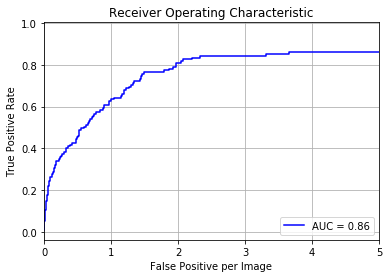

In [53]:
scv , prob_y, y_pred = run_SVM (X_train, X_test, y_train, y_test, 'rbf')
scv2 , prob_y2, y_pred2 = run_SVM (X_test, X_train, y_test, y_train, 'rbf')

test = y_test.append(y_train)
prob = np.append(prob_y[:,1], prob_y2[:,1])

false_positive_rate, true_positive_rate, thresholds = roc_curve(test, prob, pos_label=1, drop_intermediate=True)
fp = false_positive_rate * Region_per_img
tp = 110/115 * true_positive_rate
roc_auc = auc(false_positive_rate, tp)

plt.title('Receiver Operating Characteristic')

plt.plot(fp, tp, 'b',
label='AUC = %0.2f'% roc_auc)

plt.legend(loc='lower right')
plt.xlim([-0,5])
#plt.ylim([-0,110/115])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive per Image')
plt.grid()
plt.show()

In [53]:
y_pred.shape

(3188,)

In [77]:
#run_kfold(svc)

In [19]:
parameters = [{'kernel': ['rbf'],
                'C': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.5,1],
              'gamma': [1e-4, 1e-3, 0.01, 0.1, 0.2, 0.5]}
            ]

def Mattew_score(actual,prediction):
    return matthews_corrcoef(actual, prediction)

grid_scorer = make_scorer(Mattew_score, greater_is_better=True)
#parameters = {'n_estimators': [10,20,30], 'max_features': ['auto','sqrt','log2',0.5,0.3], }

clf = GridSearchCV(svm.SVC(decision_function_shape='ovr', class_weight='balanced', probability=True), parameters, cv=25,scoring = grid_scorer)
clf.fit(X_train, y_train)

print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print()
print("Grid scores on training set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))
print()

C:\Users\mahle\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:538: RuntimeWarning: invalid value encountered in true_divide
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\mahle\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:538: RuntimeWarning: invalid value encountered in true_divide
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\mahle\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:538: RuntimeWarning: invalid value encountered in true_divide
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\mahle\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:538: RuntimeWarning: invalid value encountered in true_divide
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\mahle\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:538: RuntimeWarning: invalid value encountered in true_divide
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\mahle\Anaconda3\lib\site-packages\sklearn\metrics\classi

C:\Users\mahle\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:538: RuntimeWarning: invalid value encountered in true_divide
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\mahle\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:538: RuntimeWarning: invalid value encountered in true_divide
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\mahle\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:538: RuntimeWarning: invalid value encountered in true_divide
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\mahle\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:538: RuntimeWarning: invalid value encountered in true_divide
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\mahle\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:538: RuntimeWarning: invalid value encountered in true_divide
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\mahle\Anaconda3\lib\site-packages\sklearn\metrics\classi

C:\Users\mahle\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:538: RuntimeWarning: invalid value encountered in true_divide
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\mahle\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:538: RuntimeWarning: invalid value encountered in true_divide
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\mahle\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:538: RuntimeWarning: invalid value encountered in true_divide
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\mahle\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:538: RuntimeWarning: invalid value encountered in true_divide
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\mahle\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:538: RuntimeWarning: invalid value encountered in true_divide
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\mahle\Anaconda3\lib\site-packages\sklearn\metrics\classi

C:\Users\mahle\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:538: RuntimeWarning: invalid value encountered in true_divide
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\mahle\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:538: RuntimeWarning: invalid value encountered in true_divide
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\mahle\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:538: RuntimeWarning: invalid value encountered in true_divide
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\mahle\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:538: RuntimeWarning: invalid value encountered in true_divide
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\mahle\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:538: RuntimeWarning: invalid value encountered in true_divide
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\mahle\Anaconda3\lib\site-packages\sklearn\metrics\classi

C:\Users\mahle\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:538: RuntimeWarning: invalid value encountered in true_divide
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\mahle\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:538: RuntimeWarning: invalid value encountered in true_divide
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\mahle\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:538: RuntimeWarning: invalid value encountered in true_divide
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\mahle\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:538: RuntimeWarning: invalid value encountered in true_divide
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\mahle\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:538: RuntimeWarning: invalid value encountered in true_divide
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\mahle\Anaconda3\lib\site-packages\sklearn\metrics\classi

C:\Users\mahle\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:538: RuntimeWarning: invalid value encountered in true_divide
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\mahle\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:538: RuntimeWarning: invalid value encountered in true_divide
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\mahle\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:538: RuntimeWarning: invalid value encountered in true_divide
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\mahle\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:538: RuntimeWarning: invalid value encountered in true_divide
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\mahle\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:538: RuntimeWarning: invalid value encountered in true_divide
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\mahle\Anaconda3\lib\site-packages\sklearn\metrics\classi

C:\Users\mahle\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:538: RuntimeWarning: invalid value encountered in true_divide
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\mahle\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:538: RuntimeWarning: invalid value encountered in true_divide
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\mahle\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:538: RuntimeWarning: invalid value encountered in true_divide
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\mahle\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:538: RuntimeWarning: invalid value encountered in true_divide
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\mahle\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:538: RuntimeWarning: invalid value encountered in true_divide
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\mahle\Anaconda3\lib\site-packages\sklearn\metrics\classi

C:\Users\mahle\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:538: RuntimeWarning: invalid value encountered in true_divide
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\mahle\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:538: RuntimeWarning: invalid value encountered in true_divide
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\mahle\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:538: RuntimeWarning: invalid value encountered in true_divide
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\mahle\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:538: RuntimeWarning: invalid value encountered in true_divide
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\mahle\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:538: RuntimeWarning: invalid value encountered in true_divide
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\mahle\Anaconda3\lib\site-packages\sklearn\metrics\classi

C:\Users\mahle\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:538: RuntimeWarning: invalid value encountered in true_divide
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\mahle\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:538: RuntimeWarning: invalid value encountered in true_divide
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\mahle\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:538: RuntimeWarning: invalid value encountered in true_divide
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\mahle\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:538: RuntimeWarning: invalid value encountered in true_divide
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\mahle\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:538: RuntimeWarning: invalid value encountered in true_divide
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\mahle\Anaconda3\lib\site-packages\sklearn\metrics\classi

Best parameters set found on development set:

{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}

Grid scores on training set:

0.000 (+/-0.000) for {'C': 0.0001, 'gamma': 0.0001, 'kernel': 'rbf'}
0.000 (+/-0.000) for {'C': 0.0001, 'gamma': 0.001, 'kernel': 'rbf'}
0.000 (+/-0.000) for {'C': 0.0001, 'gamma': 0.01, 'kernel': 'rbf'}
0.000 (+/-0.000) for {'C': 0.0001, 'gamma': 0.1, 'kernel': 'rbf'}
0.000 (+/-0.000) for {'C': 0.0001, 'gamma': 0.2, 'kernel': 'rbf'}
0.000 (+/-0.000) for {'C': 0.0001, 'gamma': 0.5, 'kernel': 'rbf'}
0.000 (+/-0.000) for {'C': 0.001, 'gamma': 0.0001, 'kernel': 'rbf'}
0.000 (+/-0.000) for {'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}
0.000 (+/-0.000) for {'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}
0.000 (+/-0.000) for {'C': 0.001, 'gamma': 0.1, 'kernel': 'rbf'}
0.000 (+/-0.000) for {'C': 0.001, 'gamma': 0.2, 'kernel': 'rbf'}
0.000 (+/-0.000) for {'C': 0.001, 'gamma': 0.5, 'kernel': 'rbf'}
0.000 (+/-0.000) for {'C': 0.01, 'gamma': 0.0001, 'kernel': 'rbf'}
0.000 (+/-0.000)

In [20]:
clf.best_estimator_ 

SVC(C=1, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [21]:
print("Best Score:  %f " % (clf.best_score_ ))
print("Best Params:  %r" % (clf.best_params_ ))
print("Best Index:  %f" % (clf.best_index_ ))
print("Best Estimator:  %r" % (clf.best_estimator_ ))


Best Score:  0.315330 
Best Params:  {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
Best Index:  38.000000
Best Estimator:  SVC(C=1, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
